<a href="https://colab.research.google.com/github/nspeer12/AI_CAP4630/blob/master/hw5/hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split

# Introduction

We've all heard about "AI" in books, movies and media, and because of this, my perception of what artificial intelligence was skewed when I came into the class. This course cleared many of the common misconceptions I held. Also, many complex topics that seem unapproachable, now feel intuitive. 

#General concepts 

for instance, what is artificial intelligence, machine learning, deep learning

## What is Artificial Intelligence?
Artificial intelligence is science and engineering of building intelligent machines. This begs the question, what is intelligence? Intelligence is the ability to use information to make decisions in an effort to achieve a goal. Intelligence can be found not only in humans, but many other species. Intelligence is not only limited to mathmatical problem solving, but can also be expressed in music, language, physical activity, and many other areas. 

For example, an artificially intelligent computer program could process an image of a game board, analyze the scenario, decide on its next move, in an effort to win the game. Artificial intelligence is not limited to games and self driving cars. AI can be used to find solutions and approximate many problems, such as weather forecasts, speech recognition and generation, and even medical diagnosis. AI is a facinating science that has been contemplated since the days of early computing. Our ability to make intelligent machines is improving, and surely we will see exciting applications of this advanced technology.

## What is Machine Learning

Machine learning is the science of computer programs that are designed to improve. Machine learning programs are able to make adjustments to themselves based on their performance. The two primary subsets of machine learning are supervised learning and unsupervised learning. 

### Supervised Learning

Supervised learning is a type of machine learning in which the inputs and desired outputs are explicitly stated. A supervised machine learning program is designed to continually learn from a training set of data, and measure its performance on unseen testing data. Each time the program sees the training set, it will make incremental improvements to itself. This method is the fundamental approach to problems such as linear regression.

### Unsupervised Learning

Unsupervised learning is when a program is not given explicit training inputs and labels, but rather learns by testing against some outcome. This can be viewed as pattern recognition. Common problems for unsupervised learning include classification

### Reinforcement Learning

Reinforcement learning operates differently than the previously mentioned machine learning methods. In reinforcement learning, there is an *agent* and an *environemnt*. The agent interacts with the environment in order to earn rewards and avoid punishment. I like to think of this as operant conditioning for your computer. This method can be applied to video games, as they offer an ideal environment to train an agent. A famous example or reinforcement learning would be AlphaGo, which demonstrated the power of current machine learning technology by defeating Lee Sedol, who is considered to be the best human player at the game. 



## Deep Learning

Deep learning is an area of machine learning in which data structures called artificial neural networks (ANN) are utilized. In deep learning, ANNs are often fully connected, directed, weighted graphs. ANNs recieve some data through the input layer, then possibly pass transformed data to the hidden layers, and finally output some values in the output layer.


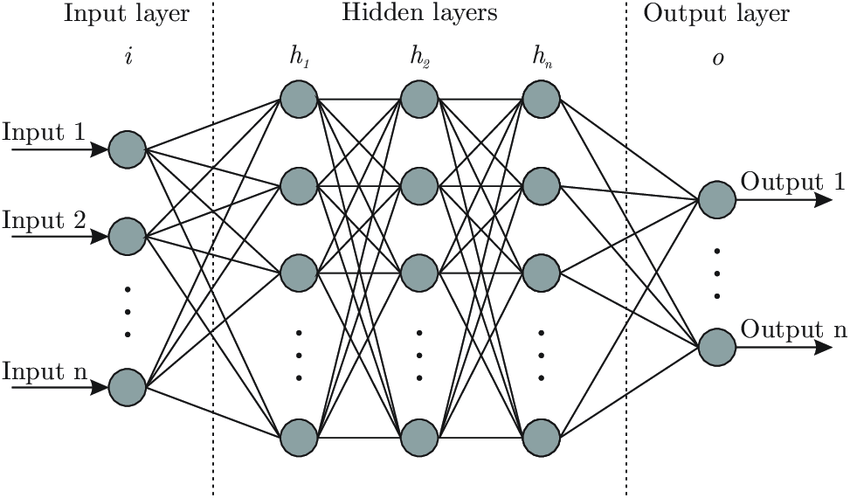

#Basic concepts

What I really value throughout this course is how I gained a great understanding of the concepts that are fundamental to machine learning. Prior to this course, I often found myself trying to learn something that was too far outside of my current understanding. After learning these key concepts, I feel as if I have a solid understanding of the most important concepts that are key to building more complex and interesting machine learning programs.

## Linear Regression

What is so beautiful about linear regression, is that it is simply just $ y = mx + b $ . In linear regression, the objective of the machine learning program is to approximate the equation of a line, based on the input data and label values specified. A linear regression model is able to make incremental adjustments to the weights based on the gradient of the loss function.

Linear regression can also be multidimensional, and the model is represented by the equation

$ \hat y = b + w_1 x_1 + w_2 x_2 + ... + w_n x_n $

In [0]:
# Get some data 
m = 100
x = 2 * np.random.rand(m, 1)
y = 4 + 3 * x + np.random.rand(m, 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True)

### Creating a Linear Regression Model in Keras

In [0]:
model = keras.Sequential()

# for a simple 2d linear regression, the input is of size 1 and the output is of size 1
model.add(keras.layers.Dense(1, input_shape=(1,), activation='linear'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.5)
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
3/3 [==============================] - 0s 2ms/step - loss: 51.6381 - mse: 52.3848
Epoch 2/50
3/3 [==============================] - 0s 2ms/step - loss: 39.9073 - mse: 40.7954
Epoch 3/50
3/3 [==============================] - 0s 3ms/step - loss: 32.0341 - mse: 31.8228
Epoch 4/50
3/3 [==============================] - 0s 3ms/step - loss: 23.6614 - mse: 24.7614
Epoch 5/50
3/3 [==============================] - 0s 1ms/step - loss: 19.3676 - mse: 19.4791
Epoch 6/50
3/3 [==============================] - 0s 2ms/step - loss: 14.8462 - mse: 15.1747
Epoch 7/50
3/3 [==============================] - 0s 1ms/step - loss: 11.8122 - mse: 11.8825
Epoch 8/50
3/3 [==============================] - 0s 2ms/step - loss: 9.1701 - mse: 9.3004
Epoch 9/50
3/3 [==============================] - 0s 2ms/step - loss: 7.1615 - mse: 7.3210
Epoch 10/50
3/3 [==============================] - 0s 1ms/step - loss: 5.5687 - mse: 5.7838
Epoch 11/50
3/3 [==============================] - 0s 1ms/step - loss: 4.51

### Drawing Prediction Line

It is possible to extract the weights from our model and plot out the line of prediction for the linear regression. Simply, our model contains 2 weights, first being $w$ and secondly $b$. These weights take the form of 

$\hat y = wx + b$

In [0]:
weights = model.get_weights()
print(weights)

[array([[3.564825]], dtype=float32), array([3.8492854], dtype=float32)]


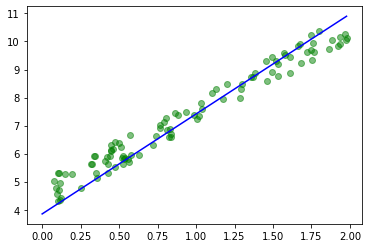

In [0]:
fig, ax = plt.subplots()

space = np.linspace(0, max(x))

pred_line = space * weights[0] + weights[1]

ax.plot(space, pred_line, color='blue')

ax.scatter(x,y, color='green', alpha=0.5)

plt.show()

## Gradient Descent

Gradient descent is an implementation of calculating slope to minimize loss.  Calculus gives use the ability to determine the slope at any point in a function. Machine learning levereges this fact by taking the slope of a loss function with respect to each of its weights, and adjusts each of its weights in order to further minimize the loss of the model.

Gradient descent is the process of iteratively adjusting the weights of a model in order to minimize the loss function. By taking the gradient with respect to each weight, we are able to adjust each weight in a direction that minimizes the loss, and should improve our model. 

An analogy to this process is hiking down a mountain. The mountian represent our loss, and we need to find our way to the bottom in order to improve the model. We take reasonable steps down the mountian so that we do not fall or move too slowly. We will always move down the mountian in by moving in the steepest downward direction.

Each weight is adjusted by the gradient, multiplied by a learning rate $\alpha$ . The learning rate ensures that our model does not have a divergent loss. 

$ w = w \pm \alpha * \frac{\delta L}{\delta w}$

## Logistic Regression

Logistic regression is a machine learning model designed to make a binary classification. Logistic regression is commonly used for classification problems, such as determining if an image contains a cat or a dog.

The way this is implemented is by applying a sigmoid fucntion to the same formula as linear regression. The sigmoid function truncates the output values to a binary classification between 0 and 1. The closer the output is to 0 or 1, the more confident the model is in its prediction. The output can also be seen as a probability that the input is one class or the other.

$ \hat y = \sigma (b + w_1 x_1 + w_2 x_2 + ... + w_n x_n )$

In [0]:

np.random.seed(999)

def get_random_data(w, b, mu, sigma, m):
    
    # labels 1 and 0 with probability of 1/2
    labels = np.array([0 if np.random.rand(1) < .5 else 1 for x in range(m)])
    
    # creating an alternative list
    alt_c = [(-1)**i for i in labels]
    
    # uniform distribution [0, 1)
    x_1 = np.random.uniform(low=0, high=1, size=m)

    noise = np.multiply(alt_c, np.random.normal(loc=mu, scale=sigma, size=m)) 
    
    x_2 = np.multiply(w, x_1)
    x_2 += b
    x_2 = np.add(x_2, noise)
    
    data = np.array([x_1, x_2]).T
    return data, labels

In [0]:
def graph_random_data(data, lables):
    fig, ax = plt.subplots(figsize=(5,5))
    
    # create colors
    colors = ['red' if labels[x] == 1 else 'blue' for x in range(len(labels))]
    
    ax.scatter(data.T[0], data.T[1], c=colors)
    plt.show()

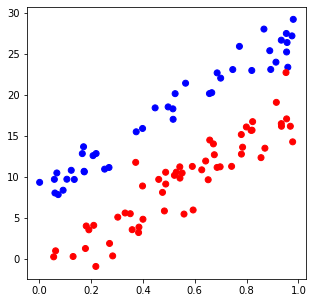

In [0]:

w = 20
b = 3
mu = 5
sigma = 2
m = 100

data, labels = get_random_data(w, b, mu, sigma, m)
graph_random_data(data, labels)

In [0]:
def build_model(input_dim, output_dim, learning_rate=0.1):
    model = keras.Sequential()
    
    # add one layer that outputs with a sigmoid function
    model.add(tf.keras.layers.Dense(output_dim, input_dim=input_dim, activation='sigmoid'))
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # specify binary cross entropy loss
    model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizer)

    return model

In [0]:
# 80/20 test train split
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

In [0]:
# input dim should be the number of features, which is 2 in our case
input_dim = 2

# output dimension is 1, which represents our classification
output_dim = 1

model = build_model(input_dim, output_dim)

EPOCHS = 200

history = model.fit(x_train, y_train, epochs=EPOCHS)

Epoch 1/200
3/3 [==============================] - 0s 1ms/step - loss: 5.0683
Epoch 2/200
3/3 [==============================] - 0s 2ms/step - loss: 3.2228
Epoch 3/200
3/3 [==============================] - 0s 2ms/step - loss: 1.4214
Epoch 4/200
3/3 [==============================] - 0s 1ms/step - loss: 0.7038
Epoch 5/200
3/3 [==============================] - 0s 2ms/step - loss: 1.2473
Epoch 6/200
3/3 [==============================] - 0s 2ms/step - loss: 0.9790
Epoch 7/200
3/3 [==============================] - 0s 1ms/step - loss: 0.4893
Epoch 8/200
3/3 [==============================] - 0s 2ms/step - loss: 0.5649
Epoch 9/200
3/3 [==============================] - 0s 1ms/step - loss: 0.6284
Epoch 10/200
3/3 [==============================] - 0s 1ms/step - loss: 0.5250
Epoch 11/200
3/3 [==============================] - 0s 1ms/step - loss: 0.4184
Epoch 12/200
3/3 [==============================] - 0s 2ms/step - loss: 0.4349
Epoch 13/200
3/3 [==============================] - 0s 1ms/st

Currently our predictions are in the form $ \hat y = \sigma ( w_1 x_1 +w_2 x_2 + b )$

To obtain our dividing line, we are trying to get our weights in the form of

$y = mx + b $

So we can isolate $x_2$ to find the line of division

$x_2 = -(w_1 x_1 + b) / w_2 $

In [0]:
# create an array to represent the space of our data
d = np.linspace(0, 1)

# get weights from model
weights = model.get_weights()

predLine = -((weights[0][0] * d) + weights[1]) / weights[0][1]
trueLine = w * d + b



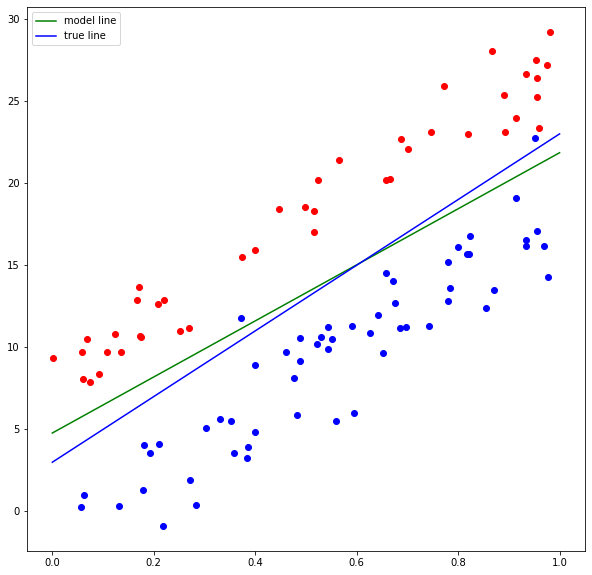

In [0]:
# plot line
fig, ax = plt.subplots(figsize=(10,10))
ax.plot(d, predLine, color='green', label='model line')
ax.plot(d, trueLine, color='blue', label='true line')


for i in range(m):
  # plot real value
  ax.scatter(data.T[0][i], data.T[1][i], c='blue' if labels[i] == 1 else 'red')

ax.legend()
plt.show()

## Convolutions

Convolutions are an operation that involve two input parameters. Firstly, an input matrix is passed, and secondly a kernel, or filter is defined. In convolutions, the kernel iterates through the columns and rows of the input matrix by a specified stride length. The regions considered are allowed to overlap. If the input, kernel, and stride length do not fit, the input matrix can be padded with zeros so the operation can be performed. The kernel iterates, and considers each subset of the input matrix. The dot product between the subset of the input and the kernel is performed, and then all of the values in this product are summed together. This final value becomes a value of our output matrix.

In [0]:
class invalidInput(Exception):
  print("Error: Input matrix is invalid!")
  exit(1)
  
class invalidKernel(Exception):
  print("Error: Kernel matrix is invalid!")
  exit(1)

Error: Input matrix is invalid!
Error: Kernel matrix is invalid!


In [0]:
def conv2d(input_mat, kernel_mat):
  #input_mat = np.matrix(input_mat)
  #kernel_mat = np.matrix(kernel_mat)
  # check for square inputs
  if kernel_mat.shape[0] != kernel_mat.shape[1]:
    raise invalidKernel()
  elif input_mat.shape[0] != input_mat.shape[1]:
    raise invalidInput()
  else:
    # get the dimensions of the output layer
    n = input_mat.shape[0] - kernel_mat.shape[0] + 1
    m = kernel_mat.shape[0]
  

  output_mat = np.zeros((n, n))

  for i in range(n):
    for k in range(n):
      # multiply by kernel filter
      #print(np.multiply(input_mat[i:i+m, k:k+m], kernel_mat))
      #print()
      conv = np.multiply(input_mat[i:i+m, k:k+m], kernel_mat)
      # sum all elements
      output_mat[i,k] = np.sum(conv)

  return output_mat

In [0]:
input_mat = np.array([[1, 2, 1, 2],
                     [2, 1, 2, 1],
                     [1, 2, 1, 2],
                     [2, 1, 2, 1]])

kernel_mat = np.array([[1, 0],
                      [0, 1]])

print(conv2d(input_mat, kernel_mat))

[[2. 4. 2.]
 [4. 2. 4.]
 [2. 4. 2.]]


# Max Pooling

Max pooling is an operation in which an input matrix and a window size of $s$ by $s$ is specified. The windows iterates throught the input matrix and considers a non overlapping region of $s$ by $s$. The maximum value in that region becomes one of the values in the output matrix. Padding is permitted if the input matrix and window size do not match.

# Building a Model

In this next example, I'm going to use the MNIST hand written diget data set to build a fully fledged convolutional neural network. 

## Data Sets

At the core of solving problems with machine learning, there is data. Without meaningful data, it would be fruitless to train machine learning models. Fortunately, there are many resources that enable people to learn machine learning without the learning curve of data science. Several libraries offer clean data sets that can be used to learn machine learning. I'm going to be using MNIST hand written digets, which is the ad nauseam "Hello, world!" of machine learning. To really apply machine learning skills to novel problems, it's a necessary step to build, clean, and train on other data sets.



### Test-Train Split

Splitting a data set into two different groups, testing and training, is a preventative measure to mitigate overfitting. We want our model to be able to operate effectively on data it has not seen before. We'll use training data to train our model, and use testing data to validate our training.

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# grab an image for testing purposes
img = x_train[0]

11493376/11490434 [==============================] - 0s 0us/step


In [0]:

# array to store all 10 of the 28x28 results
digits = np.zeros((10,28,28))

# frequency of each digit, used for averaging
freq = np.zeros(10)

# loop through training data and add it to its respective result array
for i in range(0, len(y_train)):
    freq[y_train[i]] += 1
    digits[y_train[i]] += (x_train[i])

# average out each matrix
for i in range(0,10):
    digits[i] /= freq[i]

## Visualizing Data Set

In this class, I gained a lot of experience working with matplotlib. This library is a great tool that can be used to visualize data. Unlike machines, humans have an intuitive understanding when we look at a graph or an image. Being able to visualize data helps developers and data scientists to build better models and machines.

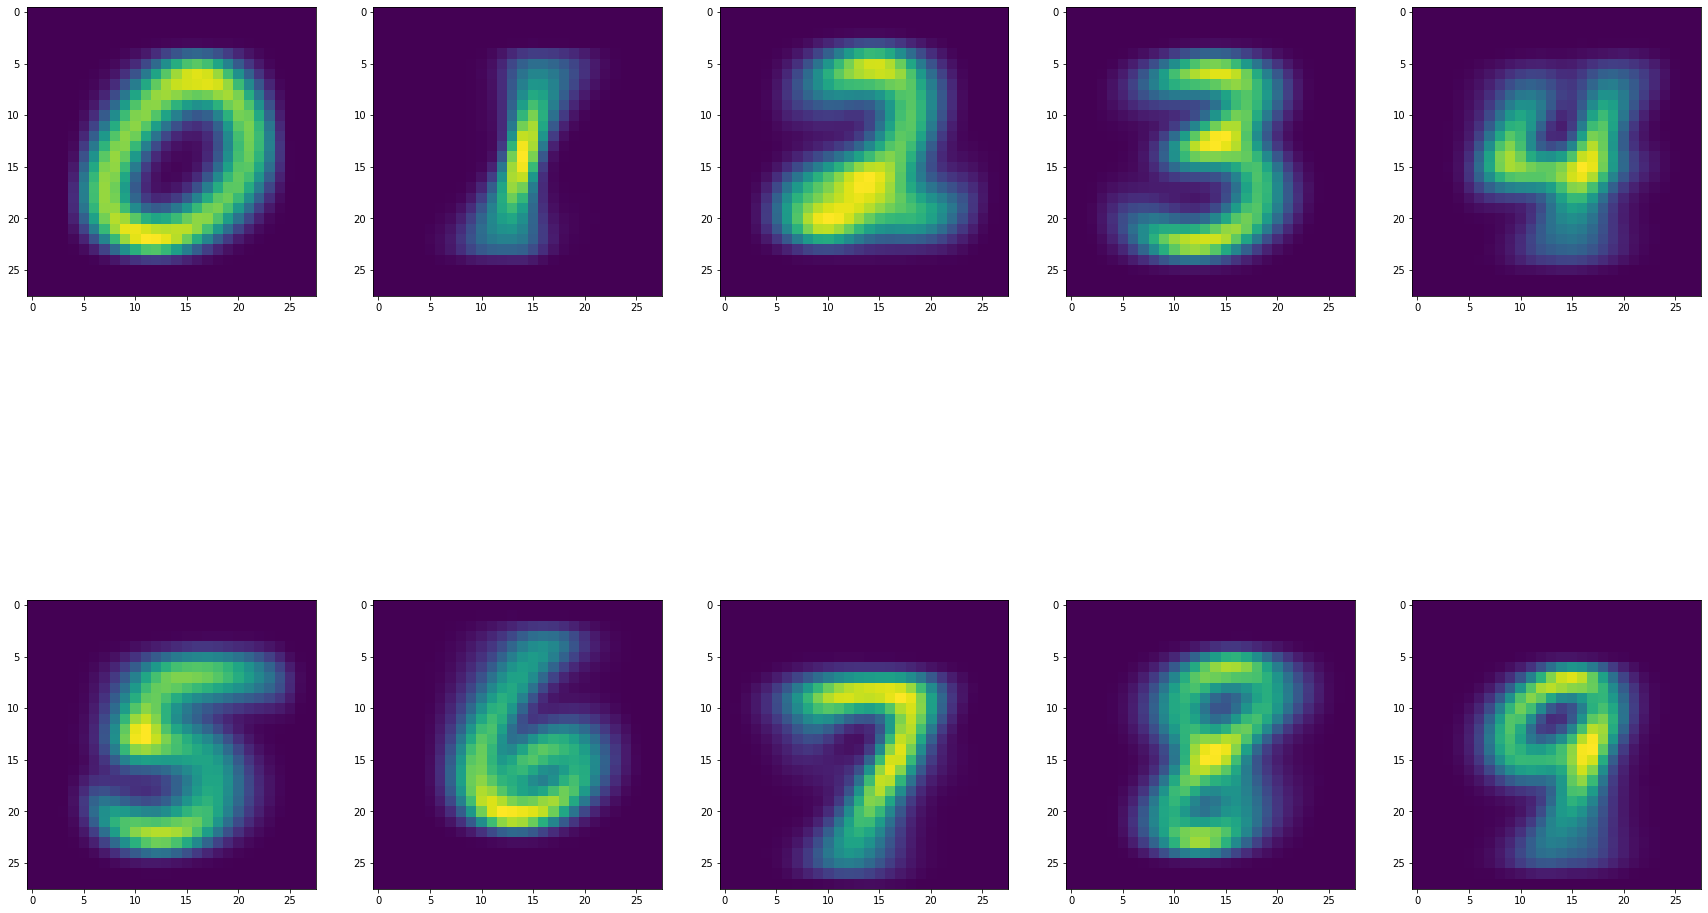

In [0]:
# plot results

fig, axs = plt.subplots(2,5, figsize=(30, 20))
axs = axs.ravel()

for i in range(10):
    axs[i].imshow(digits[i]) 

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

# Creating a Sequential Model and adding the layers
model = Sequential()


Using TensorFlow backend.


## Convolutional Layers

The MNIST data set consists of images of 28 by 28 pixels. This layer will take those images and compute convolutions on the input matrix, and performs convolutions.


In [0]:
model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))

## Max Pooling Layers

Max pooling is a function that takes in an input matrix and down-samples it to a smaller matrix. This is comprable to shrinking an image so that it has a lower resolution.  The reasoning for this technique is primarily to preserve feature extraction, while attempting to improve computational efficiency.

In [0]:
def maxpooling2d(input_mat, s):

  # handle non-square input matrix
  if input_mat.shape[0] != input_mat.shape[1]:

    # difference of number of columns and rows
    diff = input_mat.shape[0] - input_mat.shape[1]
    
    # more rows than columns
    if diff > 0:
      pad = np.zeros(input_mat.shape[1])
      input_mat = np.column_stack((input_mat, pad))

    # more columns than rows
    elif diff < 0:
      pad = np.zeros(input_mat.shape[1])
      input_mat = np.vstack((input_mat, pad))


  # pad uniformly if stride is uneven
  pad = input_mat.shape[0] % s
  input_mat = np.pad(input_mat, pad)

  # create output matrix
  n = input_mat.shape[0]
  output_dim = (int(n/s), int(n/s))
  output_mat = np.zeros(output_dim)

  # traverse input matrix in increments of s
  for i in range(0, n, s):
    for k in range(0, n, s):
      x = int(i/s)
      y = int(k/s)
      
      # output the maximum value in a subset of input matrix
      output_mat[x][y] = np.max(input_mat[i:i+s, k:k+s])

  return output_mat

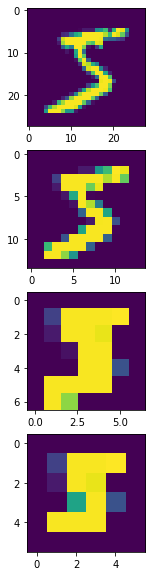

In [0]:
# compute max pooling on the input image
strides = [1, 2, 4, 6]
n = len(strides)

imgs = [maxpooling2d(img, s) for s in strides]

fig, axs = plt.subplots(n, figsize=(10,10))

for i in range(n):
    axs[i].imshow(imgs[i]) 

plt.show()

In [0]:
# add max pooling layer to our model
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Output

When building models with image data, there are many situations where intermediary layers are needed after convolutional layers and prior to output layers. Image classification is a common problem that benefit from dense layers prior to output. 

First, we will add a flattening layer, which takes the 2d output matrix from our max pooling layer, and transforms it into a 1d object. Then, we'll feed the flat matrix into our dense layer. Our dense layer will be trained to 

In [0]:
# flatten layers from 2d to 1d
model.add(Flatten())

# fully connected layer that takes flattened input
model.add(Dense(64, activation=tf.nn.relu))

## Overfitting and Dropout layers

Overfitting is a common pitfall in machine learning. When a model is being trained on a data set, it will often learn to memorize the training data rather than solve than solve it on its own. Overfitting prevent models from being applicable to data outside of it's training set. Also, it gives a sense of false accuracy, because likely the validation results will be quite high on an overfitted model.

Dropout layers are here to combat overfitting. By randomly ignoring several of our nodes in our network during each training iteration, we prevent our model from depending too much on certain nodes, and training our model more evenly so to speak. Doing so can help to create a more robust model that isn't prone to overfitting.

In [0]:
model.add(Dropout(0.2))

## Output

The output layer is a critical component in solving problems using machine learning. Depending on the problem, the output layer needs to be of a shape that represents the desired output. In the case of the MNIST data set, since we are predicting 10 classes of images, our output layer will be a dense layer of length 10.

In [0]:
model.add(Dense(10,activation=tf.nn.sigmoid))

# Activation Functions

Activation functions define the output of each node in a neural network [1]. Different activation functions are used for different purposes, which are typically based on the mathematics of the problem trying to be modeled.

## Sigmoid Activation

This semester, we applied sigmoid activations to logistic regression problems. In logistic regession, we are trying to classify a given input in a range of 0 to 1. 0 represents the first class, and 1 represents the other class. The closer the output value is to either 0 or 1, the more confident the model is in that assumption. An unconfident output may be a prediction near 0.5, because the model would be uncertain if the input belongs in either class. The sigmoid activation is represented by the function:

$ \sigma(x) = \frac{1}{1 + e^{-x}} $


## RELU

RELU, or Rectified Linear Unit is a linear activation function. One benefit of having a linear activation function is that continuously differentiable, since the derivative of a linear function is always constant. 

$f(x) = \begin{cases} 0 \text{ for } x \leq 0 \\ x \text{ for } x > 0\end{cases}$



# Compiling a Model and Hyper Parameters

Compiling a model is the step where the library, such as tf.keras, takes the different layers that we specified and creates a model that can be trained and run predictions on. Typically during model compilation, a few parameters can be specified, such as optimizer, loss, and learning rate.

# Optimizers

Optimizers are functions that assist in gradient descent. They apply different strategies to updating weights in order to achieve faster and more accurate training results. Two commonly used optimizers include SGD and Adam.


### Stochastic Gradient Descent

Stochastic gradient descent is an optimization function that approximates the gradient in order to reduce the computation needed for updating weights [4]. This prioritizes faster training, rather than accuracy of gradient calculations and rate of convergence.

### Adam

The Adam optimizer utilizes adaptive learning rates when training. This is useful because at first, the weights of a model may need to be updated by relatively large amounts to get reasonable results, but as the model improves, a large learning rate may result in divergence. Adam lowers the learning rate as the model improves, and is able to settle in a minimum of the loss function.

# Learning Rate

Each time a model is trained, the gradient of the loss function in respect to each weight is computed. In order to improve the model, the model must update its weights by this graident. However, if the model updates its weights by the entirity of the gradient, then results would be erratic. It would be as if a model was completely gullible and beleived something at first sight. To mitigate this, a learning rate $\alpha$ is applied to the gradient to allow for smaller steps toward the minimum of the loss function. If the learning rate is too small, the model may take too long to train or get stuck in a local minimum and never acheive great results. If the learning rate is too large, the model may overshoot the minimum of the loss function and will have diverging loss. As programmers and data scientists, it is up to us to play with the learning rate and find what works best.


The weight is updated by its gradient multiplied by the learning rate.
$w = w - \alpha * \frac{\delta L}{\delta w}$

# Loss

Loss is the metric that is used to evaluate how the model performs for each prediction it makes. The loss of the model is used to compute gradient descent, which is the key mechanism machine learning models use to get better. There are a few ways to evaluate loss, and it depends on the problem being solved.

### Mean Squared Error

Mean squared error is a loss metric that calucaltes the mean based on the square of its loss. Basically, the more far off a prediction is, the loss grows by a factor of two. For each of the training examples, we make a prediction and calculate the square of the error. Summing all of these values together, then dividing by the total number of examples, the mean squarred error is calculated.

$MSE = \frac{1}{n} \Sigma^n_{i=1} (y_i - \hat y_i)^2$ 

### Binary and Categorical Cross Entropy

Cross entropy is a measure that calculates the difference between two probability distributions [3]. In classification problems, commonly probabilities are calculated for class predictions, so cross entropy loss allows the model to calculate the loss of a predicted probability. Binary cross entropy is used for binary classificaiton, and categorical cross entropy is commonly used for multi-label classifications, such as MNIST.

In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

#Training a model (for instance, you can talk about overfitting/underfitting)

In [0]:
# reshape dataset for training

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [0]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 27s 449us/step - loss: 2.4844 - accuracy: 0.2383
Epoch 2/10
60000/60000 [==============================] - 26s 439us/step - loss: 1.7134 - accuracy: 0.4035
Epoch 3/10
60000/60000 [==============================] - 26s 436us/step - loss: 1.6405 - accuracy: 0.4264
Epoch 4/10
60000/60000 [==============================] - 26s 433us/step - loss: 2.3010 - accuracy: 0.1318
Epoch 5/10
60000/60000 [==============================] - 26s 435us/step - loss: 2.3025 - accuracy: 0.0988
Epoch 6/10
60000/60000 [==============================] - 26s 432us/step - loss: 2.3025 - accuracy: 0.0988
Epoch 7/10
60000/60000 [==============================] - 26s 434us/step - loss: 2.3025 - accuracy: 0.0987
Epoch 8/10
60000/60000 [==============================] - 27s 455us/step - loss: 2.3026 - accuracy: 0.0987
Epoch 9/10
60000/60000 [==============================] - 27s 447us/step - loss: 2.3025 - accuracy: 0.0987
Epoch 10/10
60000/60000 [============

# Fine Tuning Pretrained Models

Fine tuning is a process in which a previously trained model is used to build a new model and is trained on a different data set. For example, in image recognition, companies like Google create models and train them on large data sets with expensive hardware, then release them to the public. We are then able to download those models to use and modify on our own data sets.

# Convolutional Bases

Tensorflow makes it relatively easy to load in a pretrained convolutional base, such as Inception, Resnet, or Yolo and use it for our own models and train on our own data sets. If we have a powerful model that can detect thousands of objects, but we are trying to solve a binary classification problem, very simply we can add more layers and modify the output to suit the problem we are approaching. Then we are able to train the model on our own data set and use the powerful pretrained models to acheive great results very quickly.


### Freezing Layers

Freezing layers allow us to leave some of the layers in our model untouched while we train. For convolutional bases, perhaps we do not want to modify the pretrained model and possible undo a lot of the work Google or whoever did to make the model acheive 95%+ accuracy. Freezing layers allow us to train certain layers, such as the output layers we add to the convolutional base, while maintaining the same weights of the convolutional base. It is also possible to unfreeze layers and train the convolutional base on a new data set, this is called transfer learning.

# Conclusion

Thank you to Dr. Wocjan and all of the TAs for working hard to help teach me this content. I am extremely happy with what I learned here, and I feel like I have a strong understanding of the content. I learned a lot and I am inspired to continue learning about AI and machine learning.

# Sources

[1] https://en.wikipedia.org/wiki/Activation_function

[2] https://en.wikipedia.org/wiki/Mean_squared_error

[3] https://machinelearningmastery.com/cross-entropy-for-machine-learning/

[4] https://en.wikipedia.org/wiki/Stochastic_gradient_descent